In [19]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import keras

from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation

In [11]:
with np.load('data/train_and_test.npz') as data:
    X_test = data['X_test']
    y_train = data['y_train']
    X_train = data['X_train']

Text(0.5, 1.0, '12')

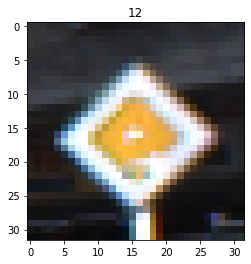

In [12]:
plt.imshow(X_train[20000])
plt.title(y_train[20000])

## Different tries at various models

In [13]:
labels = set(y_train)
img_size = 32
n_filters = 3
n_dense = 25

In [5]:
cnn = Sequential()
cnn.add(Conv2D(filters=32,
               kernel_size=(3,3), # filter size
               strides=(1,1),
               padding='same',
               input_shape=(32, 32, 3),
               activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))

cnn.add(Dropout(0.4))

cnn.add(Conv2D(filters=64,
               kernel_size=(2,2),
               strides=(1,1),
               padding='valid'))
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))

cnn.add(Flatten())
cnn.add(Dense(64))
cnn.add(Activation('relu'))

cnn.add(Dropout(0.4))

cnn.add(Dense(1))
cnn.add(Activation('sigmoid'))

cnn.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

In [16]:
# https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8

cnn = Sequential()
cnn.add(Conv2D(filters=32,
               kernel_size=(3,3), # filter size
               strides=(1,1),
               padding='same',
               input_shape=(32, 32, 3),
               activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))
cnn.add(Flatten())
cnn.add(Dense(units=128, activation='relu')) # hidden layer. TODO: optimize units value
cnn.add(Dense(units=1, activation='sigmoid'))
# adam=ADAM
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Accuracy = 0.046 vv

In [33]:
# https://www.dlology.com/blog/one-simple-trick-to-train-keras-model-faster-with-batch-normalization/
# https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks-Part-2/

# bad model
cnn = Sequential()
cnn.add(Conv2D(32, (3,3), use_bias=False))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))

cnn.add(Conv2D(32, (3,3), use_bias=False))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))

cnn.add(MaxPooling2D(pool_size=(2,2),
                     strides=2))

cnn.add(Conv2D(32, (3,3), use_bias=False))
cnn.add(BatchNormalization())
cnn.add(Activation('relu'))

cnn.add(Flatten())

cnn.add(Dense(units=1, activation='relu'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Actually working model??? !! vv
#### Accuracy caps off at 15 epochs

In [44]:
# https://www.kaggle.com/kentaroyoshioka47/cnn-with-batchnormalization-in-keras-94

img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols, 3)
batch_size = 128
num_classes = 10
epochs = 100
filter_pixel = 2
noise = 1
droprate = 0.25

model = Sequential()
#convolution 1st layer
model.add(Conv2D(32, kernel_size=(filter_pixel, filter_pixel), padding="same",
                 activation='relu',
                 input_shape=input_shape)) #0
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),
                       strides=2))
model.add(Dropout(droprate))#3

#convolution 2nd layer
model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), activation='relu',border_mode="same"))#1
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(droprate))#3

#convolution 3rd layer
model.add(Conv2D(64, kernel_size=(filter_pixel, filter_pixel), activation='relu',border_mode="same"))#1
model.add(BatchNormalization())
model.add(MaxPooling2D())
model.add(Dropout(droprate))#3

#Fully connected 1st layer
model.add(Flatten()) #7
model.add(Dense(64,use_bias=False)) #13
model.add(BatchNormalization())
model.add(Activation('relu')) #14
model.add(Dropout(droprate))      #15

#Fully connected final layer
model.add(Dense(43)) #8
model.add(Activation('softmax')) #9
# model.add(Activation('sigmoid'))


model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 32, 32, 32)        416       
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        8256      
_________________________________________________________________
batch_normalization_36 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 8, 8, 64)        

/home/tiffany/.local/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(2, 2), activation="relu", padding="same")`
/home/tiffany/.local/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, kernel_size=(2, 2), activation="relu", padding="same")`


In [ ]:
EPOCHS = 25
BATCH_SIZE = 32
y_binary = to_categorical(y_train)
hist = model.fit(X_train, 
               y_binary, 
               epochs=EPOCHS,
               batch_size=BATCH_SIZE)

Epoch 1/25
39209/39209 [==============================] - 37s 954us/step - loss: 1.7698 - accuracy: 0.5001
Epoch 2/25
39209/39209 [==============================] - 43s 1ms/step - loss: 0.5929 - accuracy: 0.8178
Epoch 3/25
39209/39209 [==============================] - 43s 1ms/step - loss: 0.3633 - accuracy: 0.8875
Epoch 4/25
39209/39209 [==============================] - 42s 1ms/step - loss: 0.2769 - accuracy: 0.9129
Epoch 5/25
39209/39209 [==============================] - 42s 1ms/step - loss: 0.2336 - accuracy: 0.9256
Epoch 6/25
39209/39209 [==============================] - 44s 1ms/step - loss: 0.2045 - accuracy: 0.9338
Epoch 7/25
39209/39209 [==============================] - 41s 1ms/step - loss: 0.1847 - accuracy: 0.9404
Epoch 8/25
39209/39209 [==============================] - 38s 979us/step - loss: 0.1718 - accuracy: 0.9441
Epoch 9/25
39209/39209 [==============================] - 39s 988us/step - loss: 0.1538 - accuracy: 0.9502
Epoch 10/25
39209/39209 [========================

In [7]:
result = model.predict(X_train)